In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv('titanic.csv', usecols=('Age', 'Fare', 'Survived'))
df.sample(5)

,Survived,Age,Fare
822,0,38.0,0.0000
67,0,19.0,8.1583
483,1,63.0,9.5875
697,1,NaN,7.7333
434,0,50.0,55.9000


In [3]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [4]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [5]:
x = df.iloc[:, 1:3]
y = df.iloc[:, 0]

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

Text(0.5, 1.0, 'Age QQ Plot')

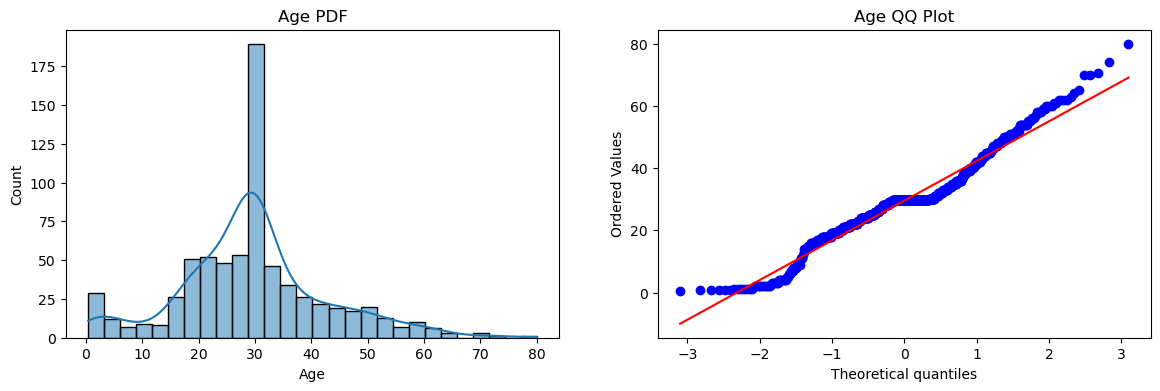

In [7]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,4))
sns.histplot(x_train['Age'], ax=ax1, kde=True)
ax1.set_title('Age PDF')
k = stats.probplot(x_train['Age'], dist='norm', plot = plt)
ax2.set_title('Age QQ Plot')

Text(0.5, 1.0, 'Fare QQ Plot')

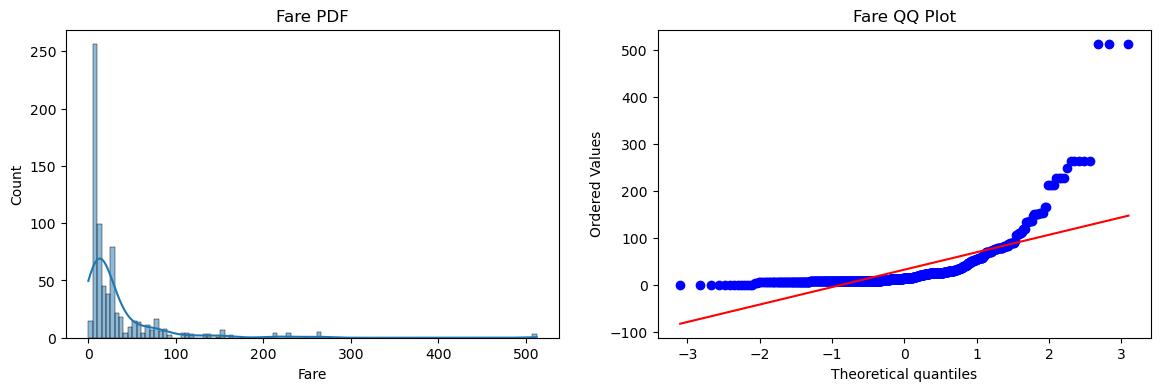

In [8]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,4))
sns.histplot(x_train['Fare'], ax=ax1, kde=True)
ax1.set_title('Fare PDF')
stats.probplot(x_train['Fare'], dist='norm', plot=plt)
ax2.set_title('Fare QQ Plot')

In [9]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()

In [10]:
lr.fit(x_train, y_train)
dt.fit(x_train, y_train)
y_pred = lr.predict(x_test)
y_pred_dt = dt.predict(x_test)
print(f"Logistic Regression (without Function Transform): {accuracy_score(y_test, y_pred)}")
print(f"Decision Tree (without Function Transform) : {accuracy_score(y_test, y_pred_dt)}")

Logistic Regression (without Function Transform): 0.6480446927374302
Decision Tree (without Function Transform) : 0.659217877094972


In [11]:
trf = FunctionTransformer(func=np.log1p)

In [12]:
x_train_trf = trf.fit_transform(x_train)
x_test_trf = trf.transform(x_test)

In [13]:
lr.fit(x_train_trf, y_train)
dt.fit(x_train_trf, y_train)
y_pred_trf = lr.predict(x_test)
y_pred_trf_dt = dt.predict(x_test)
print(f"Logistic Regression (after Function Transform): {accuracy_score(y_test, y_pred_trf)}")
print(f"Decision Tree (after Function Transform) : {accuracy_score(y_test, y_pred_trf_dt)}")

Logistic Regression (after Function Transform): 0.7374301675977654
Decision Tree (after Function Transform) : 0.5865921787709497


Text(0.5, 1.0, 'Age after log transform')

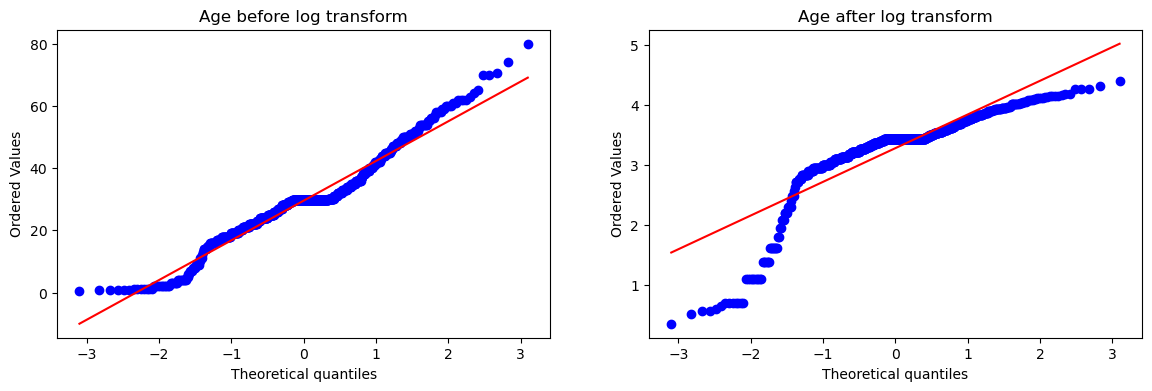

In [14]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,4))
k = stats.probplot(x_train['Age'], dist='norm', plot=ax1)
ax1.set_title('Age before log transform')

k = stats.probplot(x_train_trf['Age'], dist='norm', plot = ax2)
ax2.set_title('Age after log transform')

Text(0.5, 1.0, 'Fare after log transform')

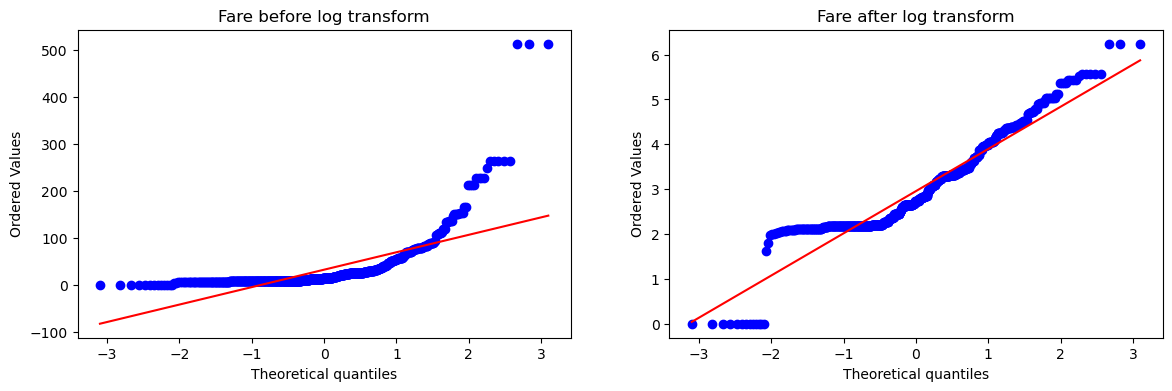

In [15]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,4))
k = stats.probplot(x_train['Fare'], dist='norm', plot=ax1)
ax1.set_title('Fare before log transform')

k = stats.probplot(x_train_trf['Fare'], dist='norm', plot = ax2)
ax2.set_title('Fare after log transform')

In [16]:
trf2 = ColumnTransformer([
    ('Log Transformer', FunctionTransformer(func=np.log1p), ['Fare'])    
], remainder='passthrough')
x_train_clf = trf2.fit_transform(x_train)
x_test_clf = trf2.transform(x_test)

In [17]:
lr.fit(x_train_clf, y_train)
dt.fit(x_train_clf, y_train)
y_pred_clf = lr.predict(x_test)
y_pred_clf_dt = dt.predict(x_test)
print(f"Logistic Regression (after Function Transform only on Age): {accuracy_score(y_test, y_pred_clf)}")
print(f"Decision Tree (after Function Transform only on Age) : {accuracy_score(y_test, y_pred_clf_dt)}")

Logistic Regression (after Function Transform only on Age): 0.40782122905027934
Decision Tree (after Function Transform only on Age) : 0.3128491620111732


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [18]:
def apply_transform(transform):
    x = df.iloc[:, 1:3]
    y = df.iloc[:, 0]
    trf = ColumnTransformer([
        ('log', FunctionTransformer(func = transform), ['Fare'])
    ], remainder='passthrough')
    x_trs = trf.fit_transform(x);
    print("Accuracy",np.mean(cross_val_score(lr,x_trs,y,scoring='accuracy',cv=10)))
    
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(14,4))
    stats.probplot(x['Fare'], dist="norm", plot=ax1)
    ax1.set_title('Fare Before Transform')

    stats.probplot(x_trs[:,0], dist="norm", plot=ax2)
    ax2.set_title('Fare After Transform')

    plt.show()

Accuracy 0.6195131086142323


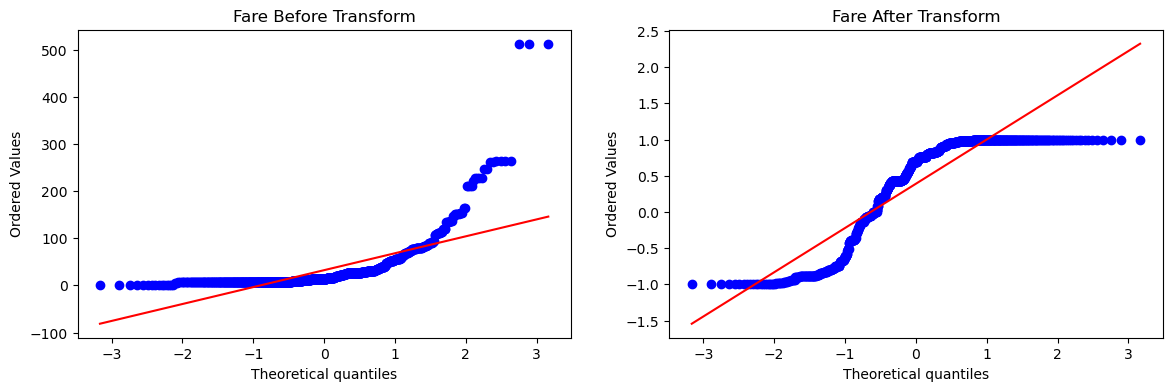

In [19]:
apply_transform(np.sin)